<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0719_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%86%8C%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers

In [2]:
from keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
inputs=keras.Input(shape=(28,28,1))

fm1 = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
fm1 = layers.MaxPooling2D(pool_size=2)(fm1)

fm2 = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(fm1)
fm2 = layers.MaxPooling2D(pool_size=2)(fm2)

fm3 = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(fm2)

x= layers.Flatten()(fm3)

outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
inputs = keras.Input(shape=(28,28,1))
fm = layers.Conv2D(filters=32,kernel_size=3,
                  activation='relu')(inputs)
fm = layers.MaxPooling2D(pool_size=2)(fm)

fm2 = layers.Conv2D(filters=64,kernel_size=3,
                  activation='relu')(fm)
fm2 = layers.MaxPooling2D(pool_size=2)(fm2)

fm3 = layers.Conv2D(filters=128,kernel_size=3,
                  activation='relu')(fm2)
x = layers.Flatten()(fm3)
outputs = layers.Dense(10,activation='softmax')(x)
model = keras.Model(inputs,outputs)


In [6]:
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
hist=model.fit(x_train, y_train, epochs=5, batch_size=64,validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 63s 81ms/step - loss: 0.1883 - accuracy: 0.9408 - val_loss: 0.0610 - val_accuracy: 0.9834
Epoch 2/5
750/750 [==============================] - 55s 73ms/step - loss: 0.0517 - accuracy: 0.9836 - val_loss: 0.0601 - val_accuracy: 0.9826
Epoch 3/5
750/750 [==============================] - 58s 77ms/step - loss: 0.0358 - accuracy: 0.9889 - val_loss: 0.0450 - val_accuracy: 0.9883
Epoch 4/5
750/750 [==============================] - 57s 75ms/step - loss: 0.0265 - accuracy: 0.9918 - val_loss: 0.0408 - val_accuracy: 0.9893
Epoch 5/5
750/750 [==============================] - 56s 75ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0360 - val_accuracy: 0.9906


In [6]:
import gdown

In [7]:
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From: https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
To: /content/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:06<00:00, 128MB/s]


'dogs-vs-cats.zip'

In [8]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [9]:
import os,shutil,pathlib

In [10]:
original_dir=pathlib.Path('train')
new_base_dir=pathlib.Path('cats_vs_dogs_small')

In [11]:
def make_subset(subset_name,start_index,end_index):
  for category in ("cat","dog"):
    dir = new_base_dir/subset_name/category
    os.makedirs(dir)
    fnames= [f'{category}.{i}.jpg' for i in range(start_index,end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir/fname,
                      dst=dir/fname)

In [12]:
make_subset('train',start_index=0,end_index=1000)
make_subset('validation',start_index=1000,end_index=1500)
make_subset('test',start_index=1500,end_index=2500)

In [13]:
inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,kernel_size=3,activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)

In [14]:
model.compile(loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [15]:
from keras.utils import image_dataset_from_directory

In [16]:
train_dataset = image_dataset_from_directory(
    new_base_dir/"train",
    image_size=(180,180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir/"validation",
    image_size=(180,180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir/"test",
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_dataset:
    print(data_batch.shape,labels_batch.shape)

(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3) (32,)
(32, 180, 180, 3

In [20]:
import matplotlib.pyplot as plt

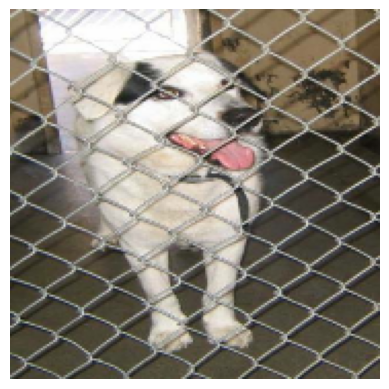

In [15]:
image=data_batch[4].numpy()
image=image.astype('int32')

plt.axis('off')
plt.imshow(image)
plt.show()

In [16]:
mcp=keras.callbacks.ModelCheckpoint(filepath='convbet_from_Scratch.keras',
                                    save_best_only=True,
                                    monitor='val_loss')
hist=model.fit(train_dataset,epochs=30,validation_data=validation_dataset,callbacks=[mcp])

Epoch 1/30
63/63 [==============================] - 17s 78ms/step - loss: 0.7163 - accuracy: 0.5020 - val_loss: 0.7132 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 5s 78ms/step - loss: 0.7059 - accuracy: 0.5105 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6939 - accuracy: 0.5310 - val_loss: 0.6899 - val_accuracy: 0.5110
Epoch 4/30
63/63 [==============================] - 6s 87ms/step - loss: 0.6880 - accuracy: 0.5550 - val_loss: 0.6820 - val_accuracy: 0.5250
Epoch 5/30
63/63 [==============================] - 4s 67ms/step - loss: 0.6489 - accuracy: 0.6205 - val_loss: 0.6633 - val_accuracy: 0.5830
Epoch 6/30
63/63 [==============================] - 5s 82ms/step - loss: 0.6117 - accuracy: 0.6695 - val_loss: 0.6428 - val_accuracy: 0.6280
Epoch 7/30
63/63 [==============================] - 4s 66ms/step - loss: 0.5916 - accuracy: 0.6870 - val_loss: 0.5904 - val_accuracy: 0.6820
Epoch 8/30
6

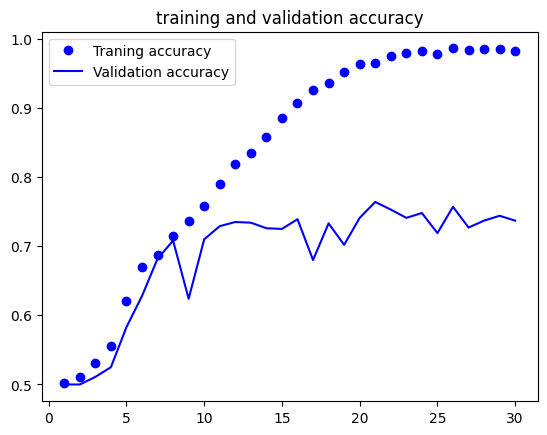

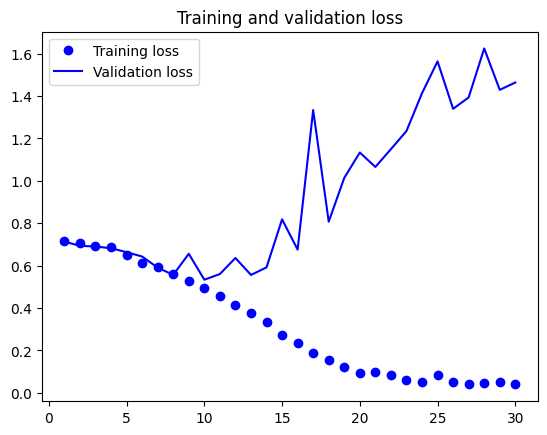

In [18]:
accuracy=hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'bo',label='Traning accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('training and validation accuracy')

plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
tm=keras.models.load_model('convbet_from_Scratch.keras')
tm.evaluate(test_dataset)

63/63 [==============================] - 3s 41ms/step - loss: 0.5542 - accuracy: 0.7245


[0.5542020797729492, 0.7245000004768372]

In [4]:
da_model=keras.Sequential()
da_model.add(layers.RandomFlip('horizontal'))
da_model.add(layers.RandomRotation(0.1))
da_model.add(layers.RandomZoom(0.2))

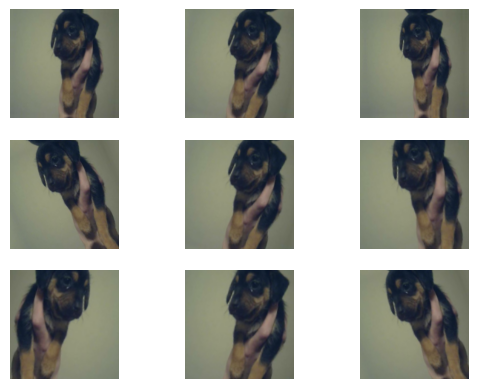

In [22]:
for images,_ in train_dataset.take(1):
    for i in range(9):
        da_images=da_model(images)
        ax=plt.subplot(3,3,i+1)
        plt.imshow(da_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [23]:
inputs = keras.Input(shape=(180,180,3))
x = da_model(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(64,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(128,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,kernel_size=3,activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(256,kernel_size=3,activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)

In [24]:
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])
mcp = keras.callbacks.ModelCheckpoint(
    filepath='convnet_from_scratch_a.keras',
    save_best_only=True,
    monitor = 'val_loss'
)
hist = model.fit(train_dataset,
                 epochs=100,
                 validation_data=validation_dataset,
                 callbacks=[mcp])

Epoch 1/100
63/63 [==============================] - 22s 100ms/step - loss: 0.7183 - accuracy: 0.5075 - val_loss: 0.6925 - val_accuracy: 0.5050
Epoch 2/100
63/63 [==============================] - 5s 70ms/step - loss: 0.7080 - accuracy: 0.5260 - val_loss: 0.6867 - val_accuracy: 0.5340
Epoch 3/100
63/63 [==============================] - 6s 85ms/step - loss: 0.7050 - accuracy: 0.5510 - val_loss: 0.6745 - val_accuracy: 0.5990
Epoch 4/100
63/63 [==============================] - 5s 68ms/step - loss: 0.6814 - accuracy: 0.5595 - val_loss: 0.6983 - val_accuracy: 0.5140
Epoch 5/100
63/63 [==============================] - 6s 90ms/step - loss: 0.6770 - accuracy: 0.5700 - val_loss: 0.7936 - val_accuracy: 0.5180
Epoch 6/100
63/63 [==============================] - 5s 70ms/step - loss: 0.6570 - accuracy: 0.6165 - val_loss: 0.6485 - val_accuracy: 0.6230
Epoch 7/100
63/63 [==============================] - 6s 86ms/step - loss: 0.6441 - accuracy: 0.6395 - val_loss: 0.6148 - val_accuracy: 0.6600
Epoc

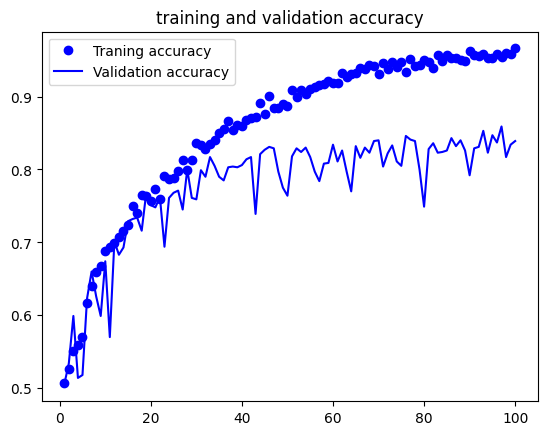

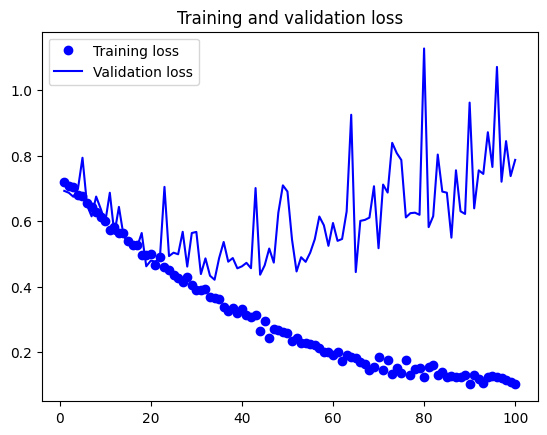

In [25]:
accuracy=hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'bo',label='Traning accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('training and validation accuracy')

plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
tm=keras.models.load_model('convnet_from_scratch_a.keras')
tm.evaluate(test_dataset)

63/63 [==============================] - 3s 37ms/step - loss: 0.4734 - accuracy: 0.7875


[0.4734388589859009, 0.7875000238418579]

# 사전 사용된 모델 사용

In [28]:
conv_base=keras.applications.vgg16.VGG16(weights='imagenet',include_top=False, input_shape=(180,180,3))

58889256/58889256 [==============================] - 0s 0us/step


In [35]:
import numpy as np
from keras.applications import vgg16
def get_features_and_labels(dataset):
    all_features=[]
    all_labels=[]
    for images, labels in dataset:
        pre_images=vgg16.preprocess_input(images)
        features=conv_base.predict(pre_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [36]:
x_train,y_train=get_features_and_labels(train_dataset)
x_val,y_val=get_features_and_labels(validation_dataset)
x_test,y_test=get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 24ms/step


In [37]:
inputs=keras.Input(shape=(5,5,512))
x=layers.Flatten()(inputs)
x=layers.Dense(256)(x)
x=layers.Dropout(0.5)(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model=keras.Model(inputs,outputs)

In [39]:
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])

mcp=keras.callbacks.ModelCheckpoint(filepath='feature_extraction.keras',
                                    save_best_only=True,
                                    monitor='val_loss')
hist=model.fit(x_train,y_train,epochs=30,validation_data=(x_val,y_val),callbacks=[mcp])

Epoch 1/30
63/63 [==============================] - 2s 10ms/step - loss: 15.1439 - accuracy: 0.9215 - val_loss: 22.2577 - val_accuracy: 0.8990
Epoch 2/30
63/63 [==============================] - 0s 8ms/step - loss: 3.6117 - accuracy: 0.9720 - val_loss: 8.0455 - val_accuracy: 0.9590
Epoch 3/30
63/63 [==============================] - 0s 6ms/step - loss: 1.8311 - accuracy: 0.9830 - val_loss: 4.4049 - val_accuracy: 0.9660
Epoch 4/30
63/63 [==============================] - 0s 6ms/step - loss: 1.1993 - accuracy: 0.9915 - val_loss: 5.1431 - val_accuracy: 0.9740
Epoch 5/30
63/63 [==============================] - 0s 6ms/step - loss: 1.0299 - accuracy: 0.9920 - val_loss: 7.3984 - val_accuracy: 0.9660
Epoch 6/30
63/63 [==============================] - 0s 5ms/step - loss: 1.4568 - accuracy: 0.9930 - val_loss: 5.4692 - val_accuracy: 0.9740
Epoch 7/30
63/63 [==============================] - 0s 8ms/step - loss: 0.3453 - accuracy: 0.9960 - val_loss: 5.8047 - val_accuracy: 0.9740
Epoch 8/30
63/63 

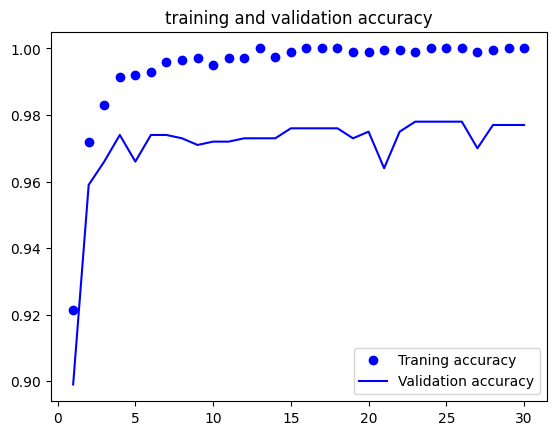

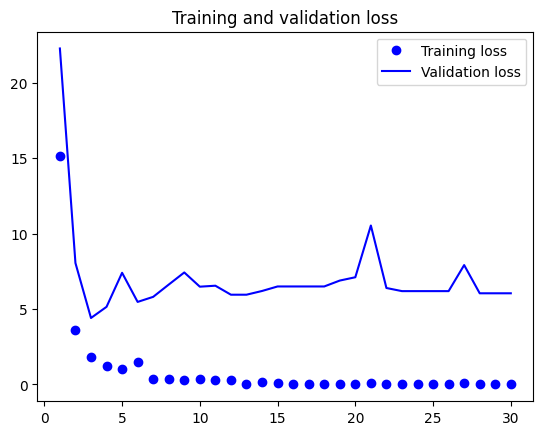

In [40]:
accuracy=hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'bo',label='Traning accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title('training and validation accuracy')

plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
for data_batch, labels_batch in train_dataset:
    print(labels_batch[0])
    break

tf.Tensor(1, shape=(), dtype=int32)


In [47]:
da_model=keras.Sequential()
da_model.add(layers.RandomFlip('horizontal'))
da_model.add(layers.RandomRotation(0.1))
da_model.add(layers.RandomZoom(0.2))

conv_base=vgg16.VGG16(weights='imagenet',include_top=False)
conv_base.trainalbe=False

inputs=keras.Input(shape=(180,180,3))
x=da_model(inputs)
x=vgg16.preprocess_input(x)
x=conv_base(x)
x=layers.Flatten()(x)
x=layers.Dense(256)(x)
x=layers.Dropout(0.5)(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model=keras.Model(inputs,outputs)

In [48]:
model.compile(loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_2   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_2 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_5 (Flatten)         (None, 12800)             0   

In [ ]:
mcp = keras.callbacks.ModelCheckpoint(
    filepath='feature_extraction_a.keras',
    save_best_only=True,
    monitor = 'val_loss'
)
hist = model.fit(train_dataset,
                 epochs=100,
                 validation_data = validation_dataset,
                 callbacks=[mcp])

Epoch 1/100
63/63 [==============================] - 37s 388ms/step - loss: 6569.6338 - accuracy: 0.5020 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 22s 344ms/step - loss: 0.6937 - accuracy: 0.4955 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 21s 334ms/step - loss: 0.6934 - accuracy: 0.5025 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 21s 331ms/step - loss: 0.6936 - accuracy: 0.4895 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/100
63/63 [==============================] - 22s 346ms/step - loss: 0.6936 - accuracy: 0.4855 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/100
63/63 [==============================] - 21s 334ms/step - loss: 0.6938 - accuracy: 0.5010 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/100
63/63 [==============================] - 22s 336ms/step - loss: 0.6938 - accuracy: 0.4925 - val_loss: 0.6931 - val_accura